Data sources : https://www.tesourotransparente.gov.br/ckan/dataset

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 75)
pd.set_option("display.min_rows", 10)

import matplotlib
matplotlib.rcParams['figure.figsize'] = (36,16)

1. Functions for search and treatment of data

In [2]:
def busca_titulos_tesouro_direto():
    url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
    df = pd.read_csv(url, sep=';', decimal=',')
    df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
    df['Data Base'] = pd.to_datetime(df['Data Base'], dayfirst=True)
    multi_indice = pd.MultiIndex.from_frame(df.iloc[:,:3])
    df = df.set_index(multi_indice).iloc[:, 3:]
    return df

In [3]:
def busca_vendas_tesouro():
    url = 'https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv'
    df = pd.read_csv(url, sep=';', decimal=',')
    df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
    df['Data Venda'] = pd.to_datetime(df['Data Venda'], dayfirst=True)
    multi_indice = pd.MultiIndex.from_frame(df.iloc[:,:3])
    df = df.set_index(multi_indice).iloc[:, 3:]
    return df

In [4]:
def busca_recompras_tesouro():
    url = 'https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv'
    df = pd.read_csv(url, sep=';', decimal=',')
    df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
    df['Data Resgate'] = pd.to_datetime(df['Data Resgate'], dayfirst=True)
    multi_indice = pd.MultiIndex.from_frame(df.iloc[:,:3])
    df = df.set_index(multi_indice).iloc[:, 3:]
    return df

2.Historical Prices and Rates of Traded Securities
This set of data contains the rates and prices of the bonds offered by the Direct Treasury. They reflect the secondary market for federal public securities.

2.1 Searching Data

In [6]:
titulos = busca_titulos_tesouro_direto()
titulos

Taxa Compra Manha  \
Tipo Titulo                            Data Vencimento Data Base                       
Tesouro Selic                          2021-03-01      2020-05-18               0.02   
Tesouro Prefixado                      2025-01-01      2020-05-18               6.67   
Tesouro Prefixado com Juros Semestrais 2027-01-01      2020-05-18               7.31   
Tesouro IPCA+ com Juros Semestrais     2026-08-15      2020-05-18               3.30   
                                       2045-05-15      2020-05-18               4.48   
                                       2024-08-15      2020-05-18               2.68   
                                       2040-08-15      2020-05-18               4.40   
Tesouro Prefixado com Juros Semestrais 2025-01-01      2020-05-18               6.37   
Tesouro IGPM+ com Juros Semestrais     2031-01-01      2020-05-18               3.99   
Tesouro IPCA+ com Juros Semestrais     2055-05-15      2020-05-18               4.48   
...                                                                              ...   
                                       2024-08-15      2019-10-10               2.49   
Tesouro Prefixado                      2020-01-01      2019-10-10               4.90   
Tesouro Prefixado com Juros Semestrais 2025-01-01      2019-10-10               6.33   
Tesouro IGPM+ com Juros Semestrais     2031-01-01      2019-10-10               2.99   
Tesouro Prefixado                      2021-01-01      2019-10-10               4.64   
Tesouro IPCA+                          2045-05-15      2019-10-10               3.41   
Tesouro Selic                          2023-03-01      2019-10-10               0.01   
Tesouro IPCA+ com Juros Semestrais     2050-08-15      2019-10-10               3.50   
                                       2020-08-15      2019-10-10               1.35   
Tesouro Prefixado com Juros Semestrais 2029-01-01      2019-10-10               6.85   

                                                                   Taxa Venda Manha  \
Tipo Titulo                            Data Vencimento Data Base                      
Tesouro Selic                          2021-03-01      2020-05-18              0.03   
Tesouro Prefixado                      2025-01-01      2020-05-18              6.79   
Tesouro Prefixado com Juros Semestrais 2027-01-01      2020-05-18              7.43   
Tesouro IPCA+ com Juros Semestrais     2026-08-15      2020-05-18              3.42   
                                       2045-05-15      2020-05-18              4.60   
                                       2024-08-15      2020-05-18              2.80   
                                       2040-08-15      2020-05-18              4.52   
Tesouro Prefixado com Juros Semestrais 2025-01-01      2020-05-18              6.49   
Tesouro IGPM+ com Juros Semestrais     2031-01-01      2020-05-18              4.11   
Tesouro IPCA+ com Juros Semestrais     2055-05-15      2020-05-18              4.60   
...                                                                             ...   
                                       2024-08-15      2019-10-10              2.61   
Tesouro Prefixado                      2020-01-01      2019-10-10              5.02   
Tesouro Prefixado com Juros Semestrais 2025-01-01      2019-10-10              6.45   
Tesouro IGPM+ com Juros Semestrais     2031-01-01      2019-10-10              3.11   
Tesouro Prefixado                      2021-01-01      2019-10-10              4.76   
Tesouro IPCA+                          2045-05-15      2019-10-10              3.53   
Tesouro Selic                          2023-03-01      2019-10-10              0.02   
Tesouro IPCA+ com Juros Semestrais     2050-08-15      2019-10-10              3.62   
                                       2020-08-15      2019-10-10              1.47   
Tesouro Prefixado com Juros Semestrais 2029-01-01      2019-10-10              6.97   

                                        

In [7]:
titulos.sort_index(inplace=True)
titulos

Taxa Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                       
Tesouro IGPM+ com Juros Semestrais 2005-07-01      2004-12-31               9.23   
                                                   2005-01-03               9.23   
                                                   2005-01-04               9.26   
                                                   2005-01-05               9.28   
                                                   2005-01-06               9.31   
                                                   2005-01-07               9.87   
                                                   2005-01-10              10.14   
                                                   2005-01-11              10.26   
                                                   2005-01-12              10.89   
                                                   2005-01-13              10.89   
...                                                                          ...   
Tesouro Selic                      2027-03-01      2022-11-04               0.14   
                                                   2022-11-07               0.14   
                                                   2022-11-08               0.14   
                                                   2022-11-09               0.14   
                                                   2022-11-10               0.14   
                                                   2022-11-11               0.14   
                                                   2022-11-14               0.14   
                                                   2022-11-16               0.15   
                                                   2022-11-17               0.15   
                                                   2022-11-18               0.14   

                                                               Taxa Venda Manha  \
Tipo Titulo                        Data Vencimento Data Base                      
Tesouro IGPM+ com Juros Semestrais 2005-07-01      2004-12-31              9.25   
                                                   2005-01-03              9.25   
                                                   2005-01-04              9.28   
                                                   2005-01-05              9.30   
                                                   2005-01-06              9.33   
                                                   2005-01-07              9.89   
                                                   2005-01-10             10.16   
                                                   2005-01-11             10.28   
                                                   2005-01-12             10.91   
                                                   2005-01-13             10.91   
...                                                                         ...   
Tesouro Selic                      2027-03-01      2022-11-04              0.15   
                                                   2022-11-07              0.15   
                                                   2022-11-08              0.15   
                                                   2022-11-09              0.15   
                                                   2022-11-10              0.15   
                                                   2022-11-11              0.15   
                                                   2022-11-14              0.15   
                                                   2022-11-16              0.16   
                                                   2022-11-17              0.16   
                                                   2022-11-18              0.15   

                                                               PU Compra Manha  \
Tipo Titulo                        Data Vencimento Data Base                     
Tesouro IGPM+ com Juros Semestrais 2005-07-01      2004-

In [8]:
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().tolist()
tipos_titulos

['Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Selic']

2.2 Tesouro Selic

In [9]:
data_venc = '2025-03-01'
selic2025 = titulos.loc[('Tesouro Selic',data_venc)]
selic2025

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2019-02-01,0.02,0.06,9926.99,9902.94,9900.45
2019-02-04,0.02,0.06,9929.43,9905.40,9902.91
2019-02-05,0.02,0.06,9931.88,9907.87,9905.36
2019-02-06,0.02,0.06,9934.34,9910.33,9907.83
2019-02-07,0.02,0.06,9936.79,9912.80,9910.29
2019-02-08,0.02,0.06,9939.25,9915.26,9912.76
2019-02-11,0.02,0.06,9941.70,9917.72,9915.22
2019-02-12,0.02,0.06,9944.16,9920.19,9917.68
2019-02-13,0.02,0.06,9946.61,9922.65,9920.15


<AxesSubplot: xlabel='Data Base'>

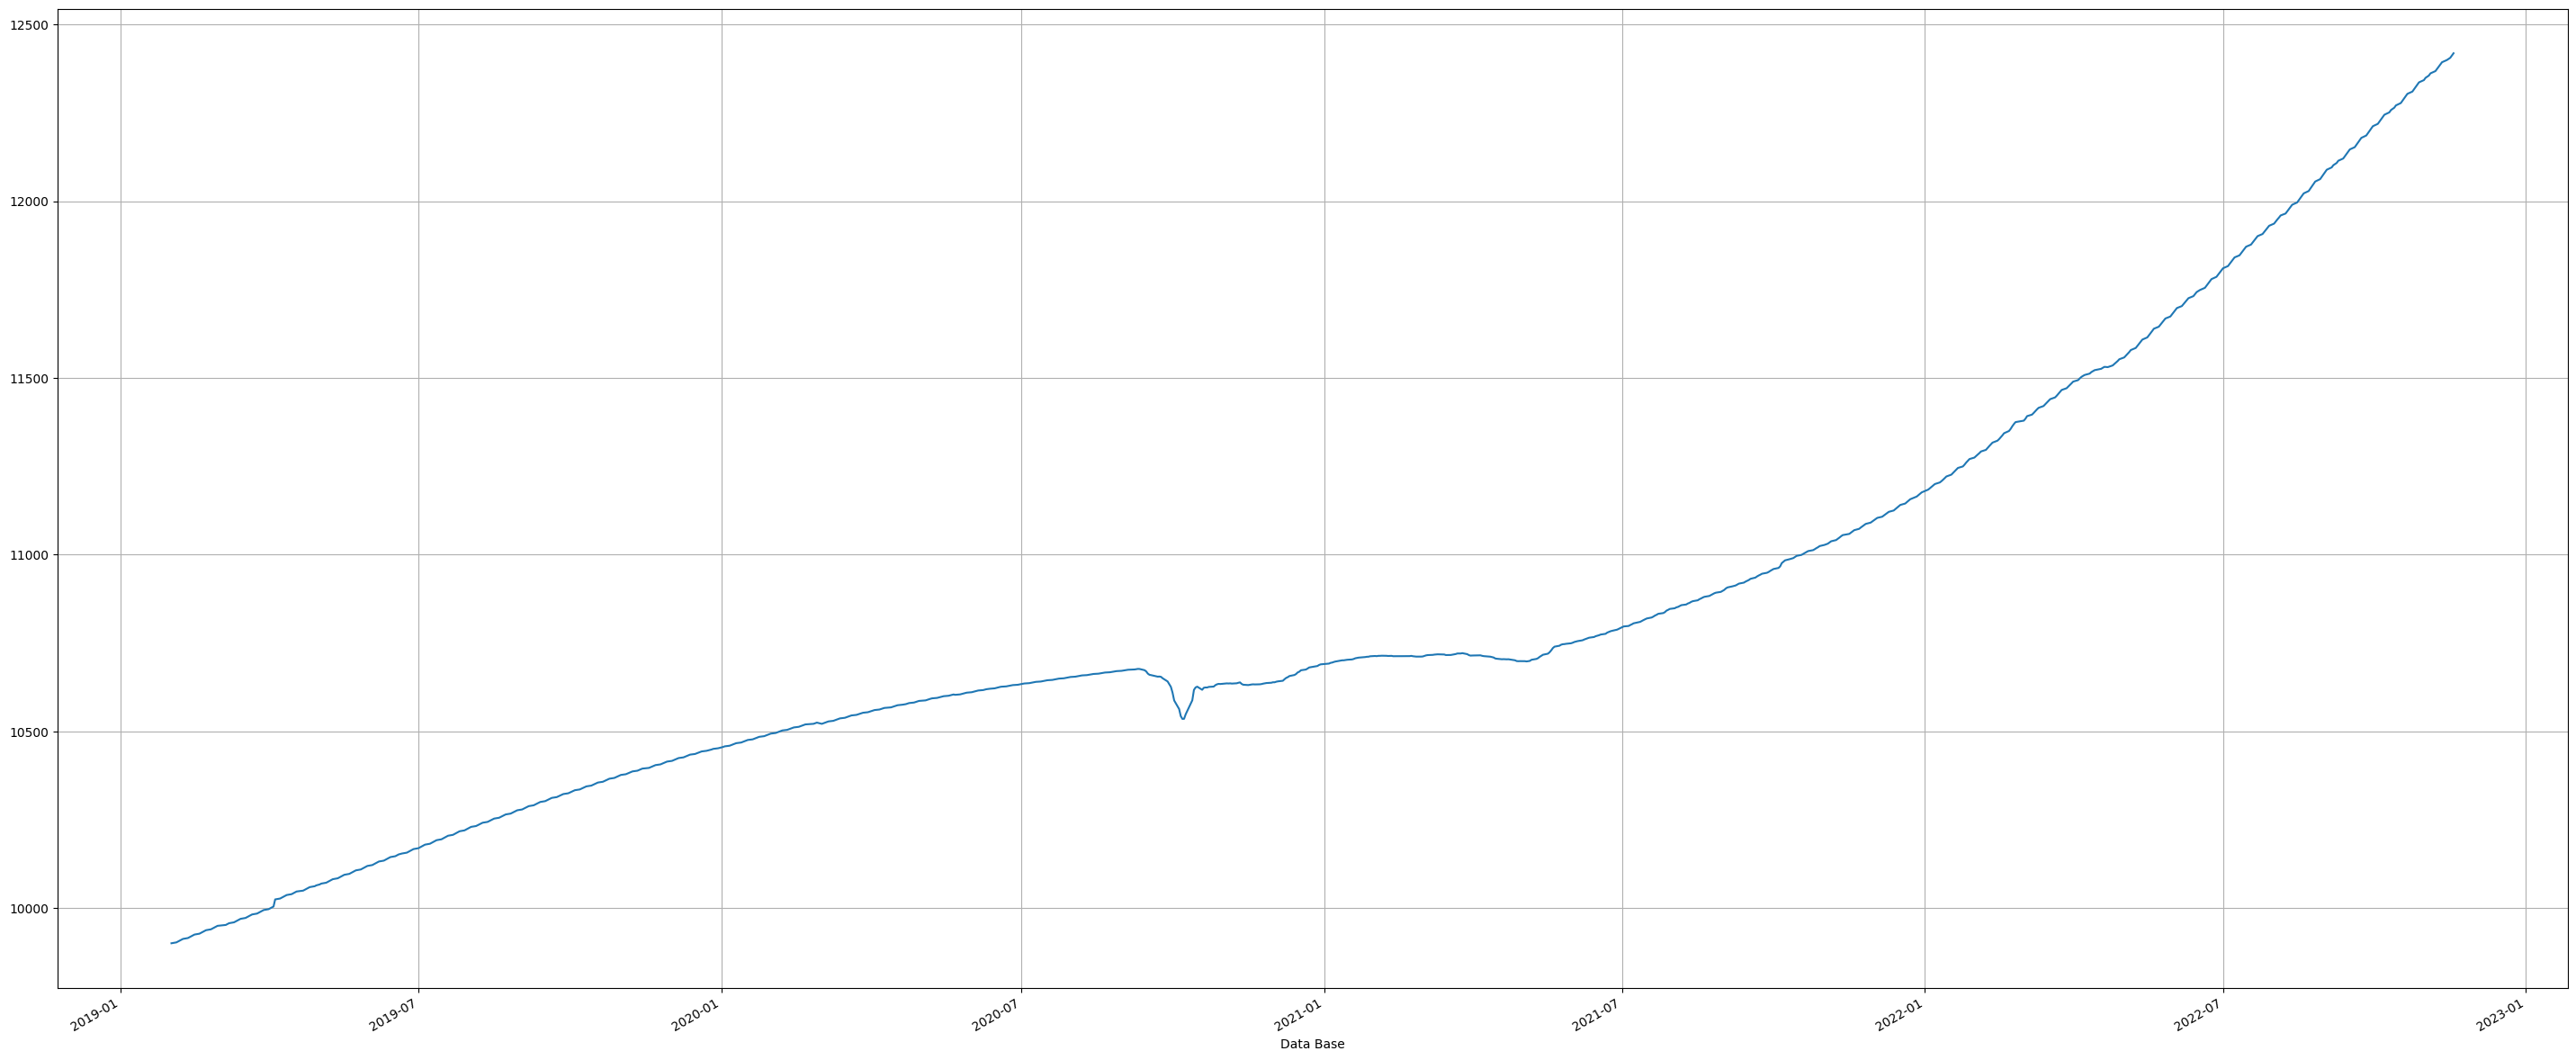

In [10]:
selic2025['PU Base Manha'].plot(grid=True)

<AxesSubplot:xlabel='Data Base'>

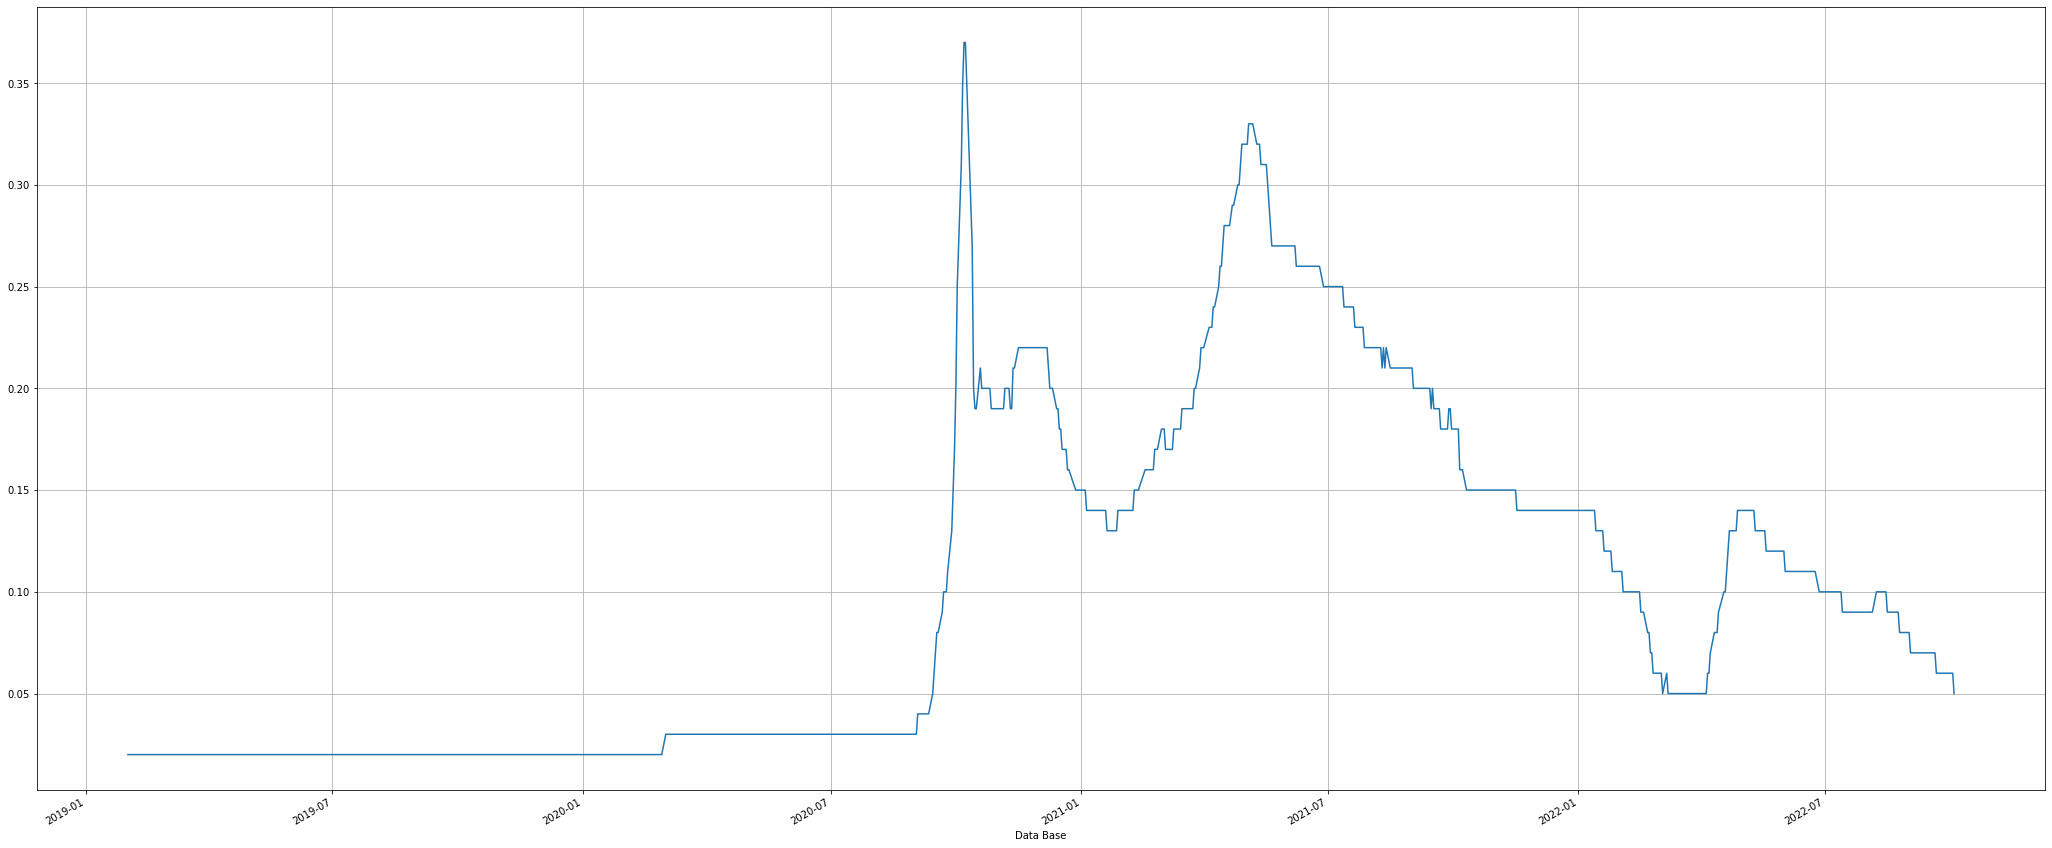

In [26]:
selic2025['Taxa Compra Manha'].plot(grid=True)

2.3 Pré-fixado 2023

In [27]:
pre2023 = titulos.loc[('Tesouro Prefixado', '2023-01-01')]
pre2023

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2016-01-26,16.59,16.65,346.72,345.49,345.28
2016-01-27,16.32,16.38,352.52,351.27,351.06
2016-01-28,16.42,16.48,350.65,349.41,349.20
2016-01-29,15.93,15.99,361.21,359.92,359.71
2016-02-01,15.89,15.95,362.28,360.99,360.78
2016-02-02,15.62,15.68,368.36,367.04,366.83
2016-02-03,15.90,15.96,362.49,361.20,360.99
2016-02-04,15.73,15.79,366.38,365.07,364.86
2016-02-05,15.99,16.05,360.98,359.70,359.49


<AxesSubplot:xlabel='Data Base'>

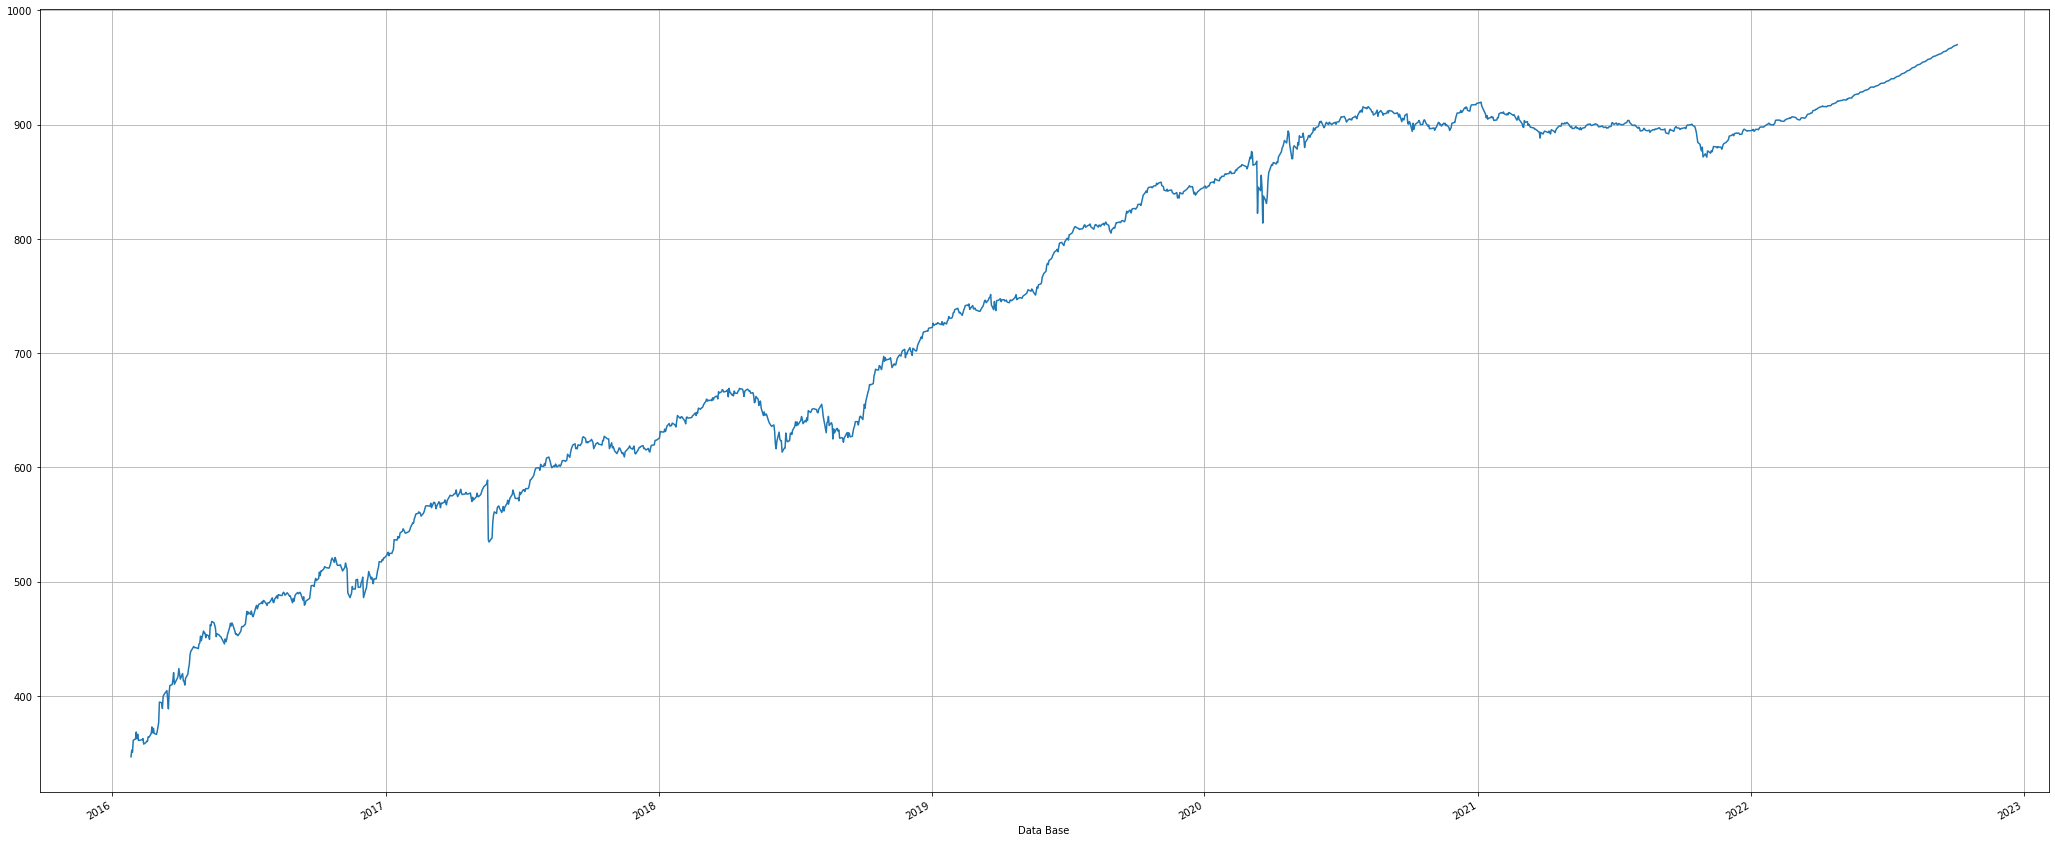

In [28]:
pre2023['PU Compra Manha'].plot(grid=True)

<AxesSubplot:xlabel='Data Base'>

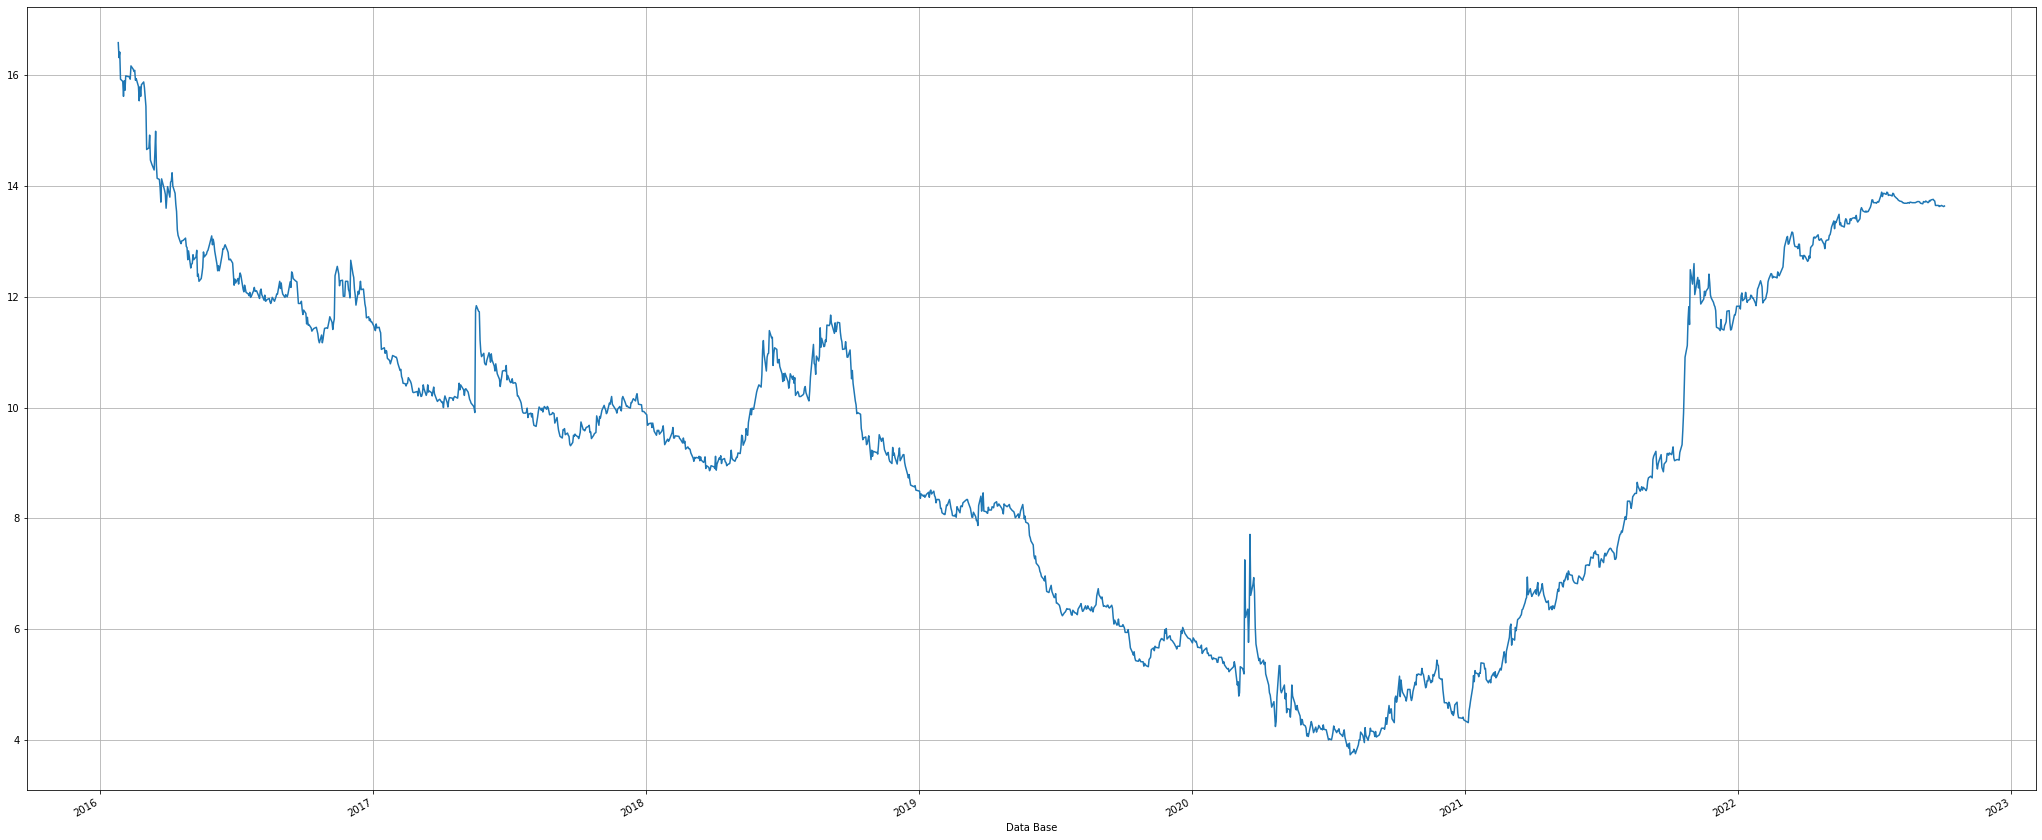

In [29]:
pre2023['Taxa Compra Manha'].plot(grid=True)

<AxesSubplot:xlabel='Data Base'>

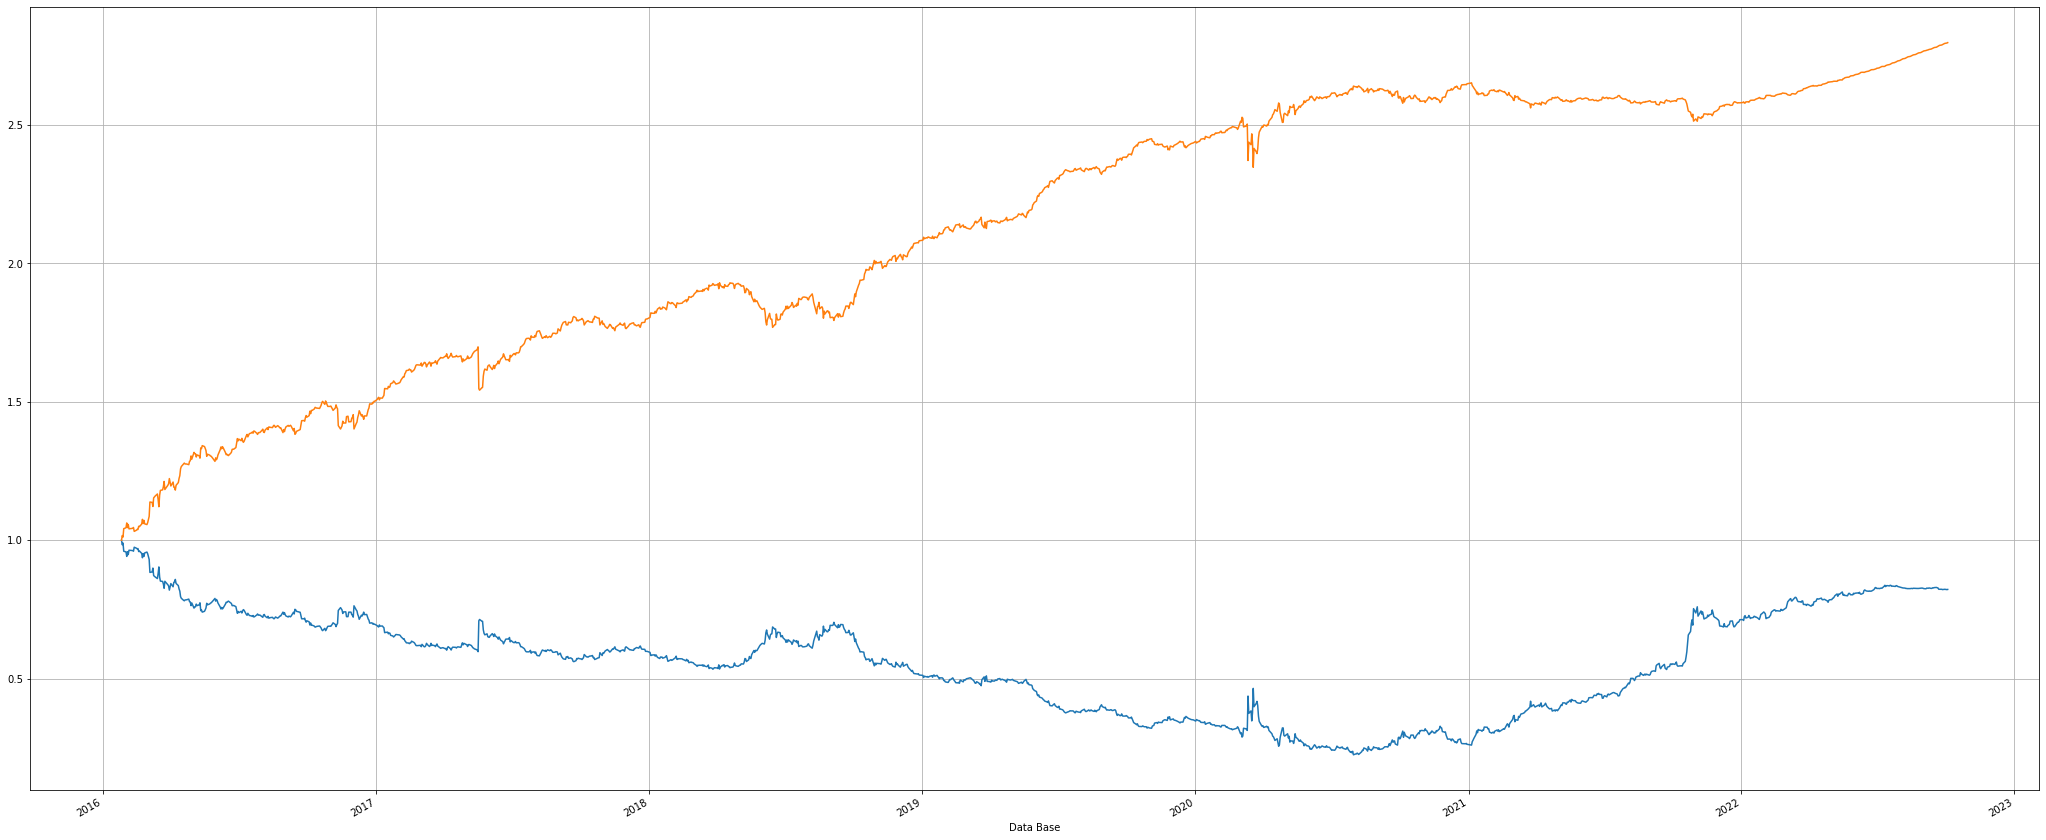

In [30]:
(pre2023['Taxa Compra Manha']/pre2023['Taxa Compra Manha'].iloc[0]).plot(grid=True)
(pre2023['PU Compra Manha']/pre2023['PU Compra Manha'].iloc[0]).plot(grid=True)

3. Vendas Tesouro Direto

Este conjunto de dados traz o volume de vendas diário do programa Tesouro Direto

3.1 Buscando dados

In [31]:
vendas = busca_vendas_tesouro()
vendas.sort_index(inplace=True)
vendas

PU  \
Tipo Titulo                        Vencimento do Titulo Data Venda                 
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2002-01-07   1038.150000   
                                                        2002-01-08   1035.590000   
                                                        2002-01-09   1035.400000   
                                                        2002-01-14   1038.166666   
                                                        2002-01-15   1038.640000   
                                                        2002-01-16   1039.052173   
                                                        2002-01-17   1039.269911   
                                                        2002-01-18   1039.259574   
                                                        2002-01-21   1039.720000   
                                                        2002-01-22   1040.189743   
...                                                                          ...   
Tesouro Selic                      2027-03-01           2022-09-20  12091.860103   
                                                        2022-09-21  12098.452839   
                                                        2022-09-22  12105.045254   
                                                        2022-09-23  12111.642869   
                                                        2022-09-26  12118.423271   
                                                        2022-09-27  12125.552610   
                                                        2022-09-28  12132.812503   
                                                        2022-09-29  12139.572463   
                                                        2022-09-30  12146.303235   
                                                        2022-10-03  12152.601953   

                                                                    Quantidade  \
Tipo Titulo                        Vencimento do Titulo Data Venda               
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2002-01-07        7.40   
                                                        2002-01-08        6.00   
                                                        2002-01-09        0.20   
                                                        2002-01-14        0.60   
                                                        2002-01-15        1.00   
                                                        2002-01-16       18.40   
                                                        2002-01-17       22.60   
                                                        2002-01-18        9.40   
                                                        2002-01-21       12.00   
                                                        2002-01-22        7.80   
...                                                                        ...   
Tesouro Selic                      2027-03-01           2022-09-20     3967.44   
                                                        2022-09-21     5250.09   
                                                        2022-09-22     3943.24   
                                                        2022-09-23     4472.85   
                                                        2022-09-26     4034.05   
                                                        2022-09-27     4311.50   
                                                        2022-09-28     3602.62   
                                                        2022-09-29     3180.22   
                                                        2022-09-30     3315.77   
                                                        2022-10-03     4350.45   

                                                                          Valor  
Tipo Titulo                        Vencimento do Titulo Data Venda               
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2002-01-07      7682.31  
            

3.2 Gráficos

<AxesSubplot:xlabel='Data Venda'>

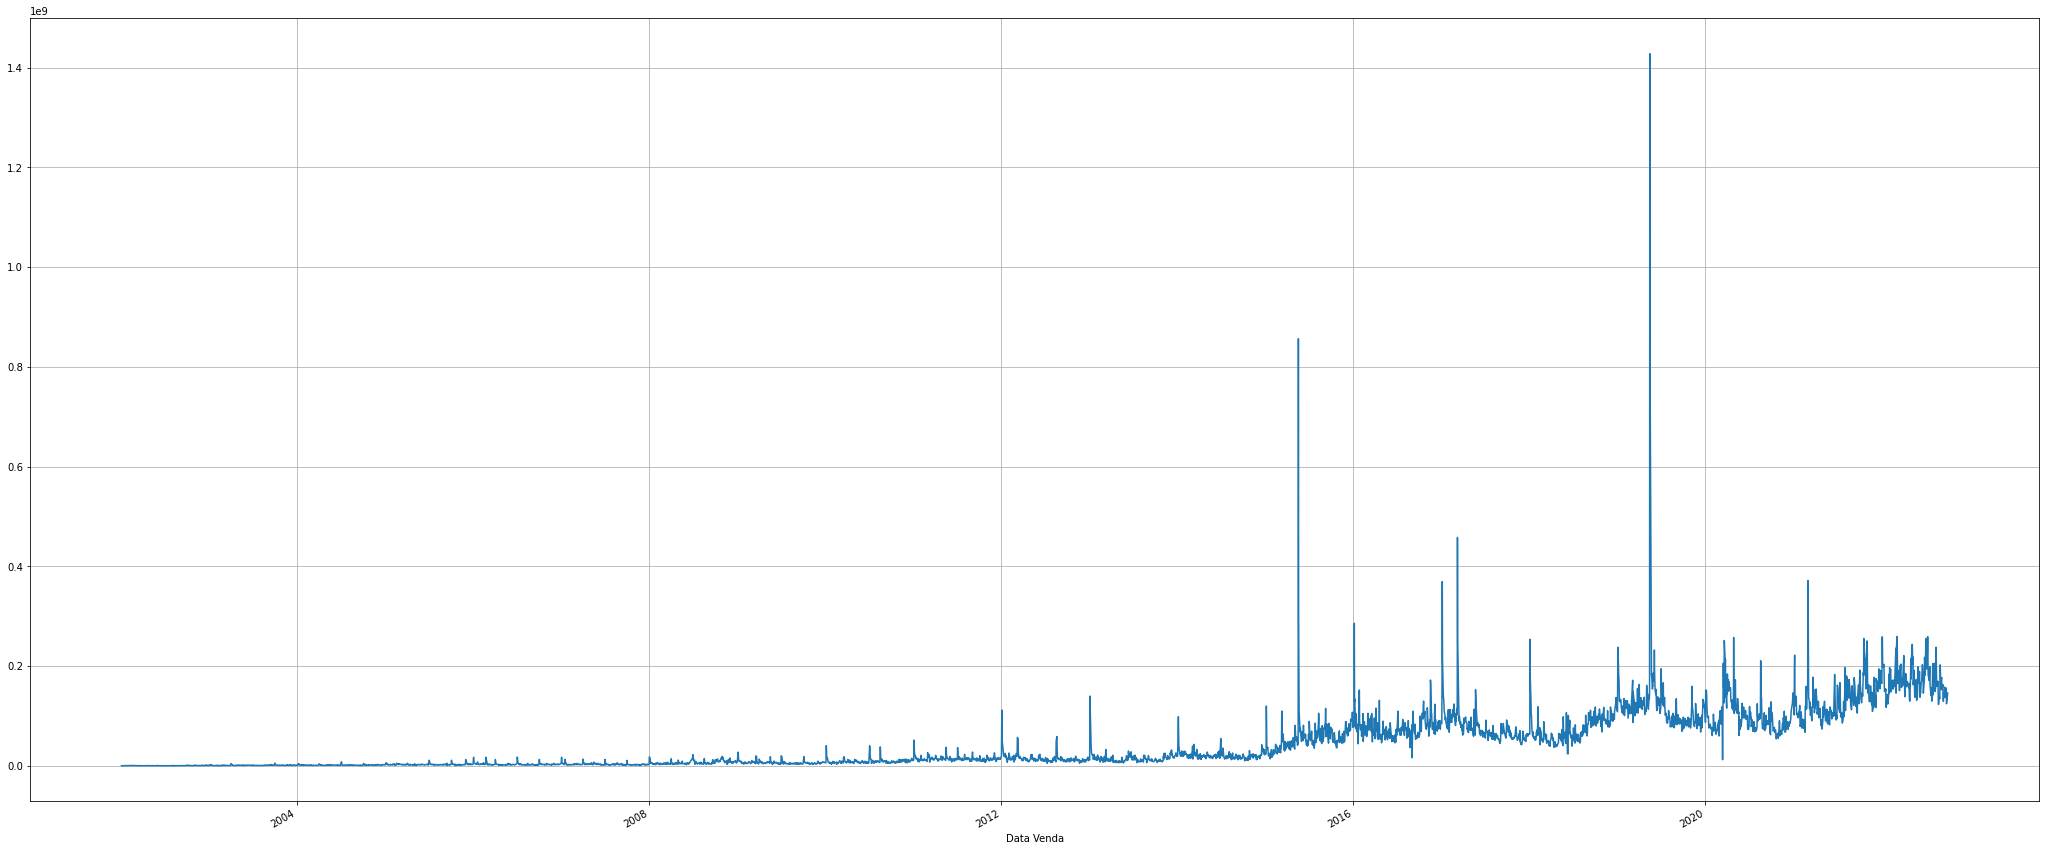

In [32]:
vendas['Valor'].groupby('Data Venda').sum().plot(grid=True)

4. Recompras Tesouro Direto

Esse conjunto de dados contém a listagem dos títulos que foram entregues pelo investidor antes do vencimento. Estão listados por dia e por título. Frequência: Atualização diária com dados até dois dias antes à data do arquivo;

4.1 Buscando Dados

In [33]:
recompras = busca_recompras_tesouro()
recompras.sort_index(inplace=True)
recompras

Quantidade  \
Tipo Titulo                        Vencimento do Titulo Data Resgate               
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2005-01-13          2.00   
                                                        2005-02-03          1.00   
                                                        2005-03-03          2.00   
                                                        2005-03-10          1.00   
                                                        2005-03-24          0.20   
                                                        2005-03-31          0.60   
                                                        2005-04-14          3.60   
                                                        2005-04-22         36.00   
                                                        2005-06-02          6.40   
                                   2005-12-01           2005-01-06        141.20   
...                                                                          ...   
Tesouro Selic                      2027-03-01           2022-09-20       1998.47   
                                                        2022-09-21       1565.52   
                                                        2022-09-22       1660.40   
                                                        2022-09-23       1488.42   
                                                        2022-09-26       2212.99   
                                                        2022-09-27       1902.16   
                                                        2022-09-28       1686.77   
                                                        2022-09-29       2074.62   
                                                        2022-09-30       1745.25   
                                                        2022-10-03       2370.95   

                                                                            Valor  
Tipo Titulo                        Vencimento do Titulo Data Resgate               
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2005-01-13        3545.04  
                                                        2005-02-03        1783.97  
                                                        2005-03-03        3595.96  
                                                        2005-03-10        1803.81  
                                                        2005-03-24         364.14  
                                                        2005-03-31        1098.15  
                                                        2005-04-14        6666.62  
                                                        2005-04-22       66912.84  
                                                        2005-06-02       11999.94  
                                   2005-12-01           2005-01-06      249321.07  
...                                                                           ...  
Tesouro Selic                      2027-03-01           2022-09-20    24154852.54  
                                                        2022-09-21    18932328.44  
                                                        2022-09-22    20090662.48  
                                                        2022-09-23    18019726.76  
                                                        2022-09-26    26807563.76  
                                                        2022-09-27    23055605.86  
                                                        2022-09-28    20456700.36  
                                                        2022-09-29    25174529.46  
                                                        2022-09-30    21189039.15  
                                                        2022-10-03    28800512.42  

[53528 rows x 2 columns]

<AxesSubplot:xlabel='Data Resgate'>

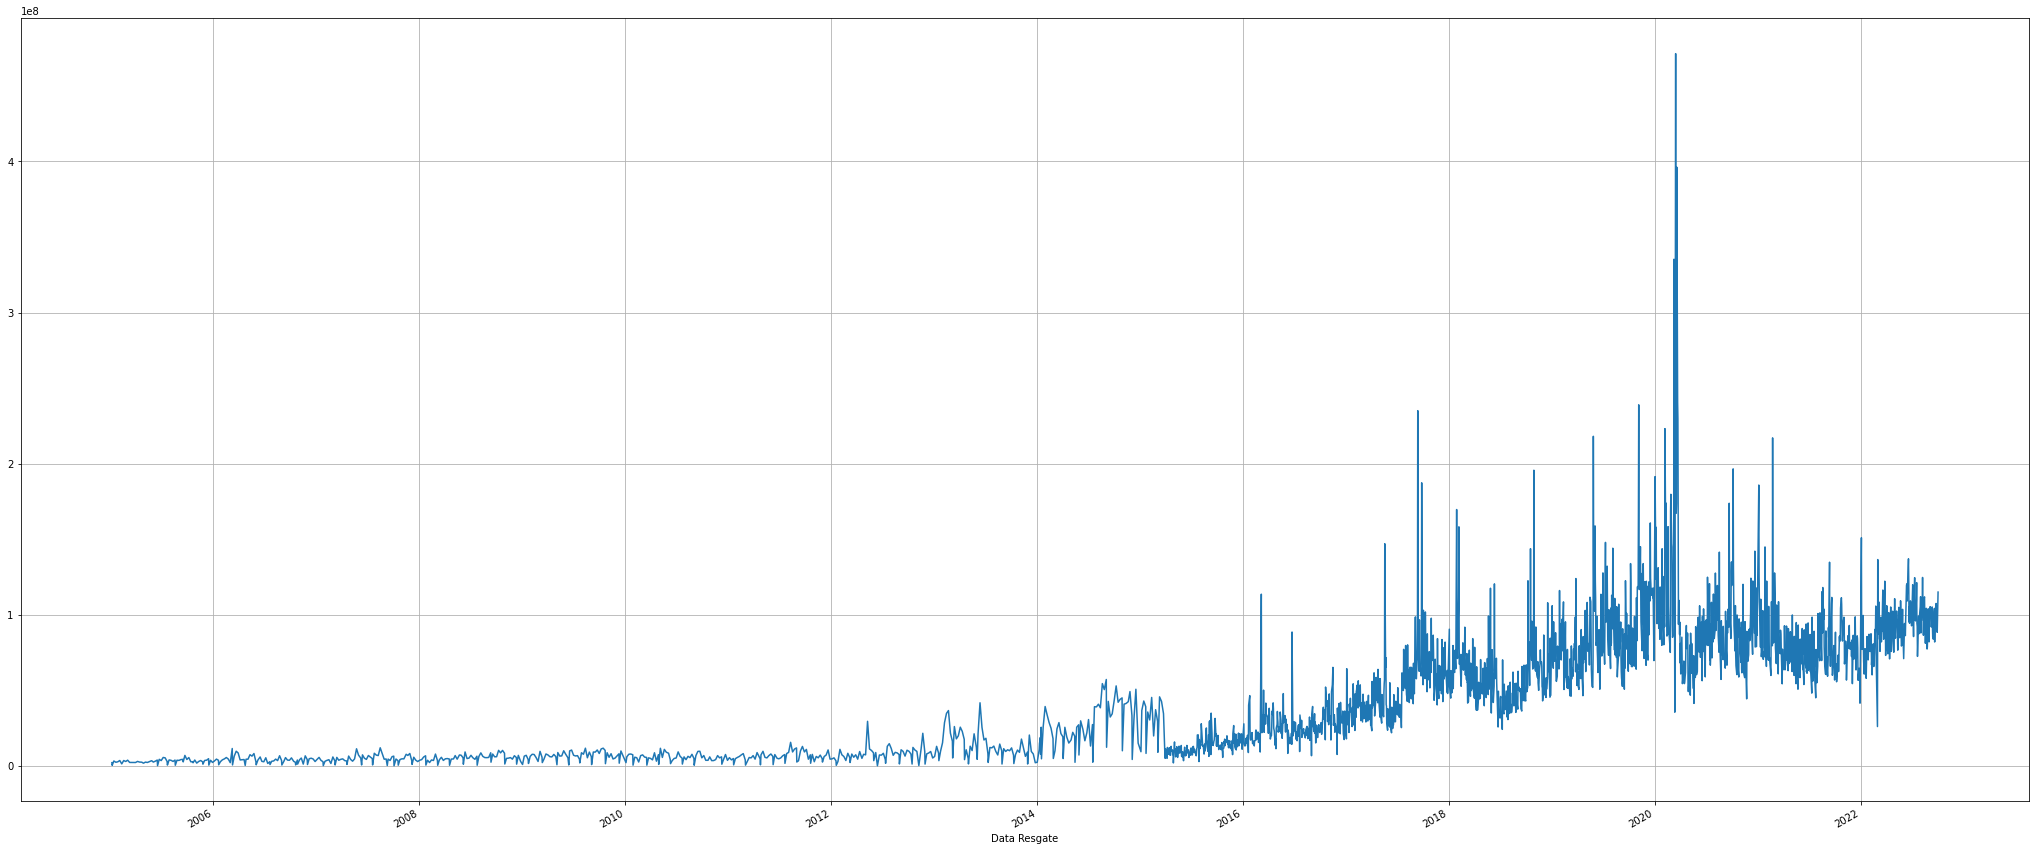

In [34]:
recompras['Valor'].groupby('Data Resgate').sum().plot(grid=True)